Decision Tree classifier: 
It is a supervised machine learning algorithm used for both classification and regression task.
A decision tree is a graphical representation used for decision-making and classification. It consists of nodes, branches, and leaves that collectively form a tree-like structure.
It operates by segmenting the data into smaller and smaleer groups until each group can be classified or predicted with high degree of accuracy

->pre-prunning and post prunning are used to reduce overfitting by hyper parameter (max_depth,max_feature)

Application:
->Email filtering 
->Customer segmentation
->House price prediction
->Risk management 
->Finance,fraud detection 

Advantages:
->Simplicity and easy to implement
-> Feature Engineering
->Non-linear relationship; capable of capturing non-linear relationship bw feature and target variable

Disadvantage:
->Over fitting : high variance
-> Scalability : concern for very large dataset 
-> more training time for large dataset

In [1]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

Read the Data

In [2]:
data=sns.load_dataset('iris')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
data.shape

(150, 5)

EDA : Exploratory Data Analysis

In [4]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
data.duplicated().sum()

1

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.118129,0.873738,0.820620
sepal_width,-0.118129,1.000000,-0.426028,-0.362894
petal_length,0.873738,-0.426028,1.000000,0.962772
petal_width,0.820620,-0.362894,0.962772,1.000000


Data visualization

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

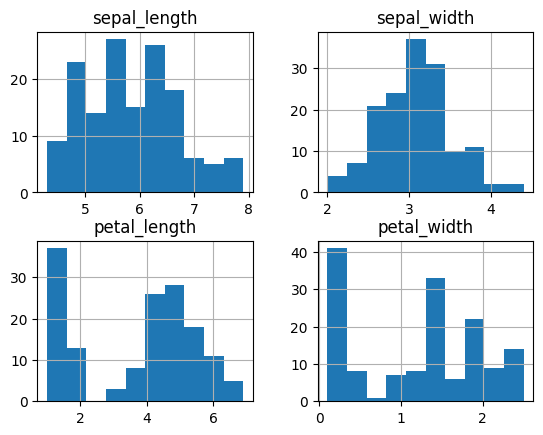

In [8]:
data.hist()

<Axes: xlabel='species', ylabel='count'>

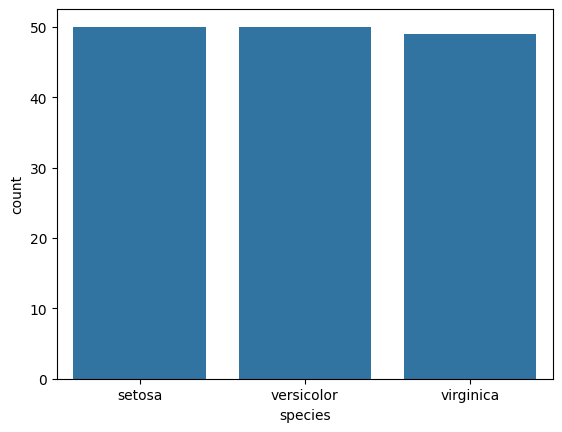

In [9]:
sns.countplot(x='species',data=data)

<Axes: >

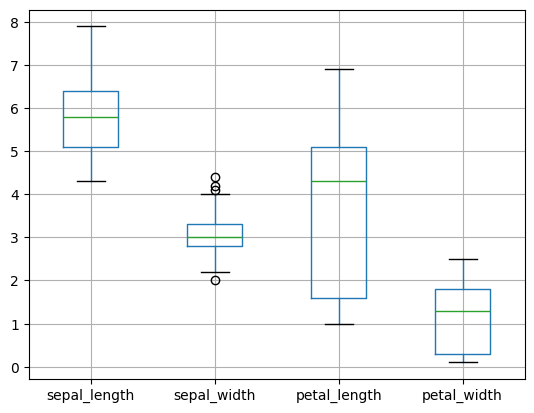

In [10]:
data.boxplot()

In [11]:
# Detect outliers using IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define a function to identify outliers
def detect_outliers_iqr(data):
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
    return outliers

# Apply the function to the dataframe
outliers = detect_outliers_iqr(data)

# Print outliers summary
print(outliers.sum())

petal_length    0
petal_width     0
sepal_length    0
sepal_width     4
species         0
dtype: int64


In [12]:
# Remove outliers from the dataframe
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Axes: >

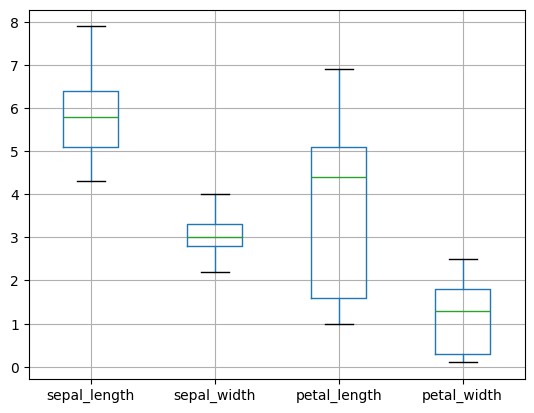

In [13]:
data.boxplot()

<Axes: >

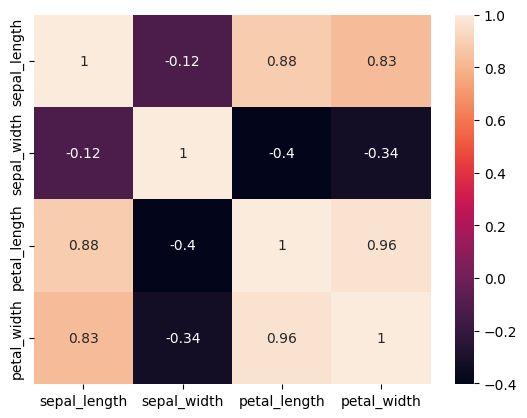

In [14]:
sns.heatmap(data.corr(),annot=True)

Data Encoding

In [15]:
label=LabelEncoder()
data['species']=label.fit_transform(data['species'])
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
data['species'].unique()

array([0, 1, 2])

Split the data

In [17]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [18]:
x,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [145 rows x 4 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 145    2
 146    2
 147    2
 148    2
 149    2
 Name: species, Length: 145, dtype: int32)

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

Standardization

In [20]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

Model Building

In [21]:
# pre-prunning
treeclassifier=DecisionTreeClassifier()
treeclassifier.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.4, 0.9, 'x[2] <= -0.685\ngini = 0.664\nsamples = 101\nvalue = [32, 38, 31]'),
 Text(0.2, 0.7, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0]'),
 Text(0.6, 0.7, 'x[3] <= 0.627\ngini = 0.495\nsamples = 69\nvalue = [0, 38, 31]'),
 Text(0.4, 0.5, 'x[2] <= 0.704\ngini = 0.136\nsamples = 41\nvalue = [0, 38, 3]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.6, 0.3, 'x[3] <= 0.489\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 28\nvalue = [0, 0, 28]')]

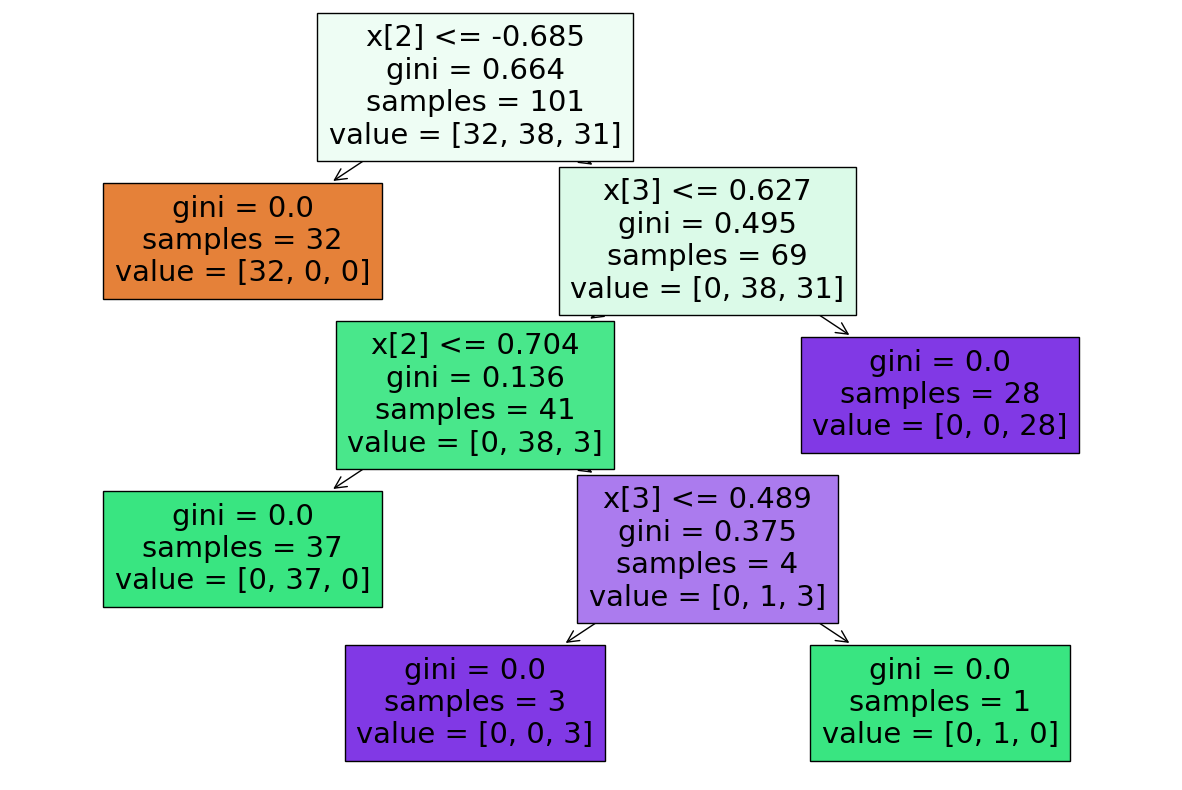

In [22]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

In [23]:
y_pred=treeclassifier.predict(x_test)
y_pred

array([1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1, 2, 1, 1, 0, 2, 2, 2, 2, 1, 2,
       0, 2, 0, 0, 1, 1, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0])

In [24]:
#post pruning with max_depth =2
treeclassifier=DecisionTreeClassifier(max_depth=2)
treeclassifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[3] <= -0.55\ngini = 0.664\nsamples = 101\nvalue = [32, 38, 31]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 0.627\ngini = 0.495\nsamples = 69\nvalue = [0, 38, 31]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.136\nsamples = 41\nvalue = [0, 38, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 28\nvalue = [0, 0, 28]')]

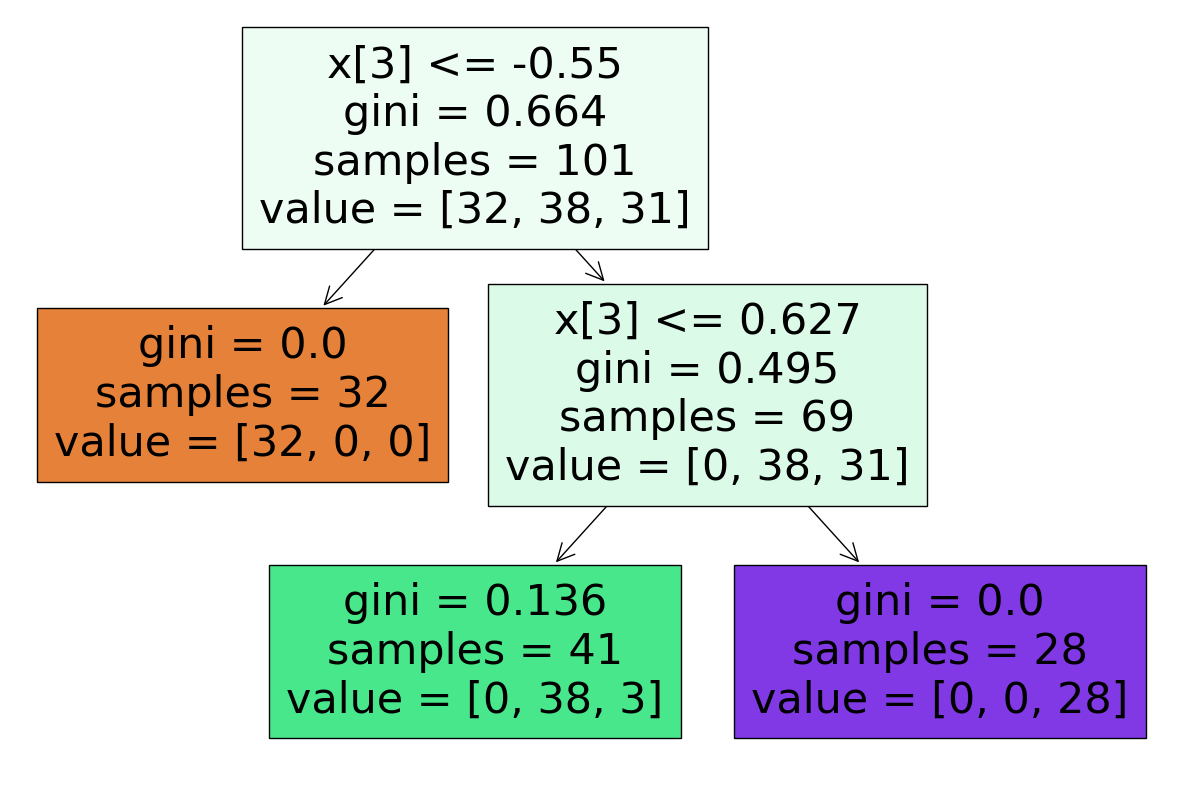

In [25]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

Performance Matrics

In [26]:
print(accuracy_score(y_pred,y_test))

0.9772727272727273


In [27]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.91      1.00      0.95        10
           2       1.00      0.95      0.97        19

    accuracy                           0.98        44
   macro avg       0.97      0.98      0.98        44
weighted avg       0.98      0.98      0.98        44



In [28]:
cm=print(confusion_matrix(y_pred,y_test))
cm

[[15  0  0]
 [ 0 10  0]
 [ 0  1 18]]


DecisionTree Prepruning and Hyper parameter tuning 


Hyper Parameter tunning

In [29]:
parameter={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}
clf=GridSearchCV(treeclassifier,param_grid=parameter,cv=5,scoring='accuracy')
clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [30]:
clf=GridSearchCV(treeclassifier,param_grid=parameter,cv=5,scoring='accuracy')
clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [31]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [32]:
y_pred=clf.predict(x_test)
y_pred

array([1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1, 2, 1, 1, 0, 1, 1, 2, 2, 1, 2,
       0, 2, 0, 0, 1, 1, 2, 0, 0, 0, 2, 1, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0])

In [33]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.91      0.77      0.83        13
           2       0.83      0.94      0.88        16

    accuracy                           0.91        44
   macro avg       0.91      0.90      0.91        44
weighted avg       0.91      0.91      0.91        44



In [34]:
print(accuracy_score(y_pred,y_test))

0.9090909090909091
